<h1> This is a notebook, not wrote by me. I've read <a href="https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d"> this recommender system article </a> that introduced me how to create recommendation systems. </h1> 

<h2> 1. Libraries </h2>

In [11]:
import pandas as pd 
import numpy as np
#####################
import warnings
#####################
import matplotlib.pyplot as plt
import seaborn as sns
#####################
%matplotlib inline
warnings.filterwarnings('ignore')

<h2> 2. Data Wrangling </h2>

In [2]:
local = 'C:\\Users\\alexander.leite\\Downloads\\ml-20m'

In [3]:
movie_titles = pd.read_csv(local+'\\'+'movies.csv')
movie_titles.head()
movie_titles.count()

movieId    27278
title      27278
genres     27278
dtype: int64

In [4]:
ratings_v1 = pd.read_csv(local+'\\'+'ratings.csv',nrows = 100000)
ratings_v1.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
movies = pd.merge(ratings_v1, movie_titles, on='movieId')
movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [39]:
movies.describe()

,userId,movieId,rating,timestamp
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,362.830400,8572.465800,3.507605,1.092640e+09
std,196.802903,19056.086006,1.062928,1.613930e+08
min,1.000000,1.000000,0.500000,8.292350e+08
25%,198.000000,858.000000,3.000000,9.624846e+08
50%,370.000000,2109.000000,3.500000,1.089803e+09
75%,536.000000,4446.000000,4.000000,1.210656e+09
max,702.000000,128594.000000,5.000000,1.427696e+09


In [7]:
ratings = pd.DataFrame(movies.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",3.000000
'Hellboy': The Seeds of Creation (2004),2.500000
'Neath the Arizona Skies (1934),3.500000
'Round Midnight (1986),4.000000
'Til There Was You (1997),2.333333


In [8]:
ratings['number_of_ratings'] = movies.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
"""Great Performances"" Cats (1998)",3.000000,1
'Hellboy': The Seeds of Creation (2004),2.500000,1
'Neath the Arizona Skies (1934),3.500000,1
'Round Midnight (1986),4.000000,1
'Til There Was You (1997),2.333333,3


<h2> 2. Visualizations </h2>

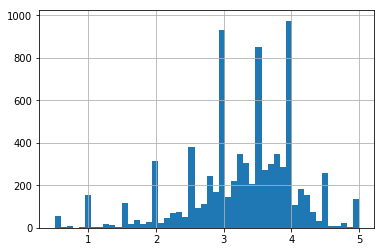

In [44]:
ratings['rating'].hist(bins=50)

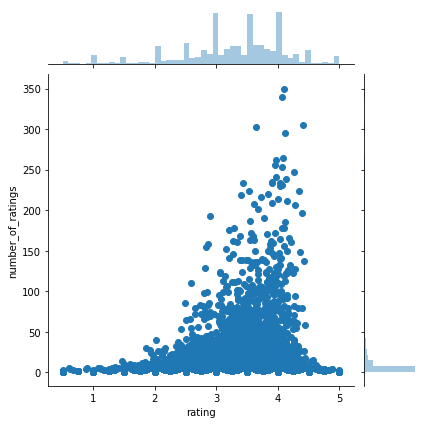

In [46]:
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

<h1>

<h2> 2. Data Pre Processing </h2>

In [14]:
movie_matrix = movies.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head(100)

title,"""Great Performances"" Cats (1998)",'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Pulp Fiction (1994),4.100000,350
Forrest Gump (1994),4.058824,340
"Shawshank Redemption, The (1994)",4.413115,305
Jurassic Park (1993),3.639073,302
"Silence of the Lambs, The (1991)",4.111864,295
Star Wars: Episode IV - A New Hope (1977),4.083333,264
Braveheart (1995),3.965649,262
Terminator 2: Judgment Day (1991),3.953125,256
"Matrix, The (1999)",4.063241,253


In [16]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

In [18]:
AFO_user_rating.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Air Force One (1997), dtype: float64

In [19]:
contact_user_rating.head()

userId
1    3.5
2    NaN
3    4.0
4    NaN
5    NaN
Name: Contact (1997), dtype: float64

In [20]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)

In [21]:
similar_to_air_force_one.head()

title
"Great Performances" Cats (1998)           NaN
'Hellboy': The Seeds of Creation (2004)    NaN
'Neath the Arizona Skies (1934)            NaN
'Round Midnight (1986)                     NaN
'Til There Was You (1997)                  1.0
dtype: float64

In [22]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

In [23]:
similar_to_contact.head()

title
"Great Performances" Cats (1998)           NaN
'Hellboy': The Seeds of Creation (2004)    NaN
'Neath the Arizona Skies (1934)            NaN
'Round Midnight (1986)                     NaN
'Til There Was You (1997)                  1.0
dtype: float64

In [24]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",0.144338
(500) Days of Summer (2009),-1.000000
*batteries not included (1987),0.385922
10 Things I Hate About You (1999),0.082269


In [25]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",0.679900
(500) Days of Summer (2009),-1.000000
*batteries not included (1987),0.522233
10 Things I Hate About You (1999),0.263967


In [26]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_AFO .head()

,correlation,number_of_ratings
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",0.679900,14
(500) Days of Summer (2009),-1.000000,26
*batteries not included (1987),0.522233,6
10 Things I Hate About You (1999),0.263967,46


In [27]:
corr_contact = corr_contact.join(ratings['number_of_ratings'])
corr_contact.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",0.144338,14
(500) Days of Summer (2009),-1.000000,26
*batteries not included (1987),0.385922,6
10 Things I Hate About You (1999),0.082269,46


In [28]:
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Sleepless in Seattle (1993),0.777322,136
Top Gun (1986),0.726077,102
Batman Forever (1995),0.689196,155
"Net, The (1995)",0.673512,123
Speed (1994),0.650397,208
E.T. the Extra-Terrestrial (1982),0.636933,158
Spider-Man (2002),0.635438,105
While You Were Sleeping (1995),0.626477,124
Pretty Woman (1990),0.622265,172


In [29]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Clear and Present Danger (1994),0.596272,138
When Harry Met Sally... (1989),0.531282,104
"Wizard of Oz, The (1939)",0.523400,117
Home Alone (1990),0.493913,141
Jumanji (1995),0.486804,112
Toy Story 2 (1999),0.482421,114
Twister (1996),0.475264,162
Big (1988),0.435989,104
"Birdcage, The (1996)",0.435431,102
